In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, LabelEncoder
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

seed = np.random.seed(1)

In [2]:
seg = pd.read_csv("retail_segmentation.csv")

In [3]:
seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cust_No         2000 non-null   int64  
 1   avg_order_size  2000 non-null   float64
 2   avg_order_freq  2000 non-null   float64
 3   crossbuy        2000 non-null   int64  
 4   multichannel    2000 non-null   int64  
 5   per_sale        2000 non-null   float64
 6   tenure          2000 non-null   int64  
 7   return_rate     2000 non-null   float64
 8   married         2000 non-null   int64  
 9   own_home        2000 non-null   int64  
 10  household_size  2000 non-null   int64  
 11  loyalty_card    2000 non-null   int64  
 12  income          2000 non-null   int64  
 13  age             2000 non-null   int64  
 14  avg_mktg_cnt    2000 non-null   float64
 15  zip_code        2000 non-null   int64  
dtypes: float64(5), int64(11)
memory usage: 250.1 KB


In [5]:
bases_variables = ['avg_order_size', 'avg_order_freq', 'crossbuy', 'multichannel', 'per_sale', 'tenure', 'avg_mktg_cnt', 'return_rate']

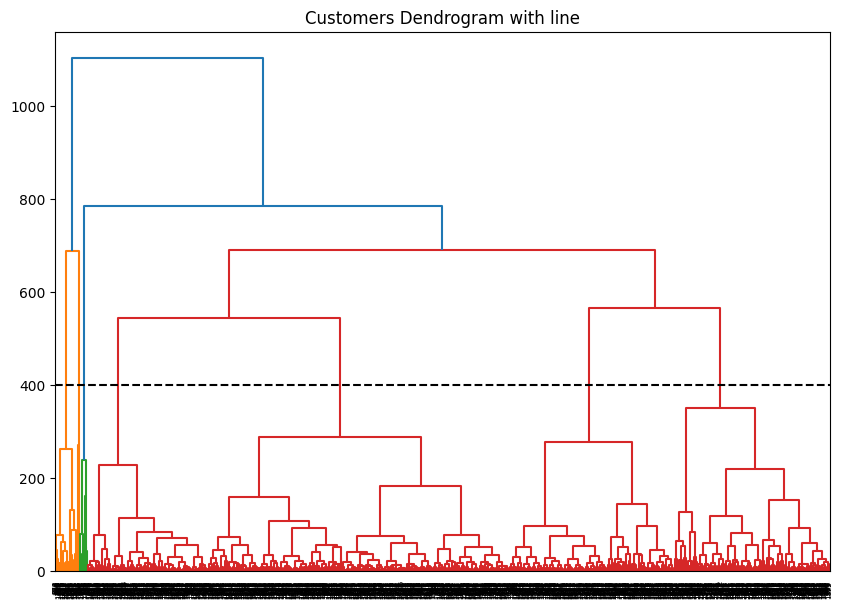

In [6]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = sch.linkage(seg[bases_variables], 
            method='ward')
sch.dendrogram(clusters)
plt.axhline(y = 400, color = 'black', linestyle = '--')


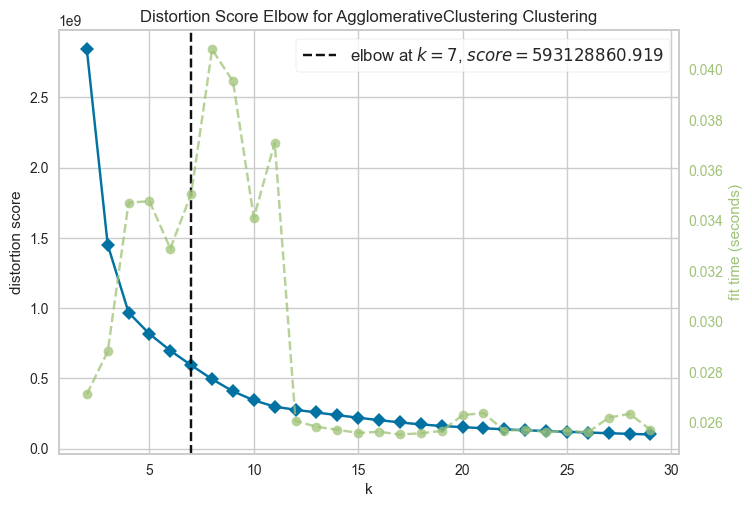

In [7]:
from yellowbrick.cluster import KElbowVisualizer


model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k = (2, 30), timings = True)
visualizer.fit(seg)
visualizer.show();

In [9]:
seg_kmeans = KMeans(n_clusters=7, random_state=seed).fit(seg[bases_variables])
segments = seg_kmeans.labels_
segmentation_result = pd.concat([seg, pd.Series(segments, name='segment')], axis=1)
segmentation_result['segment'] = segmentation_result['segment'] + 1

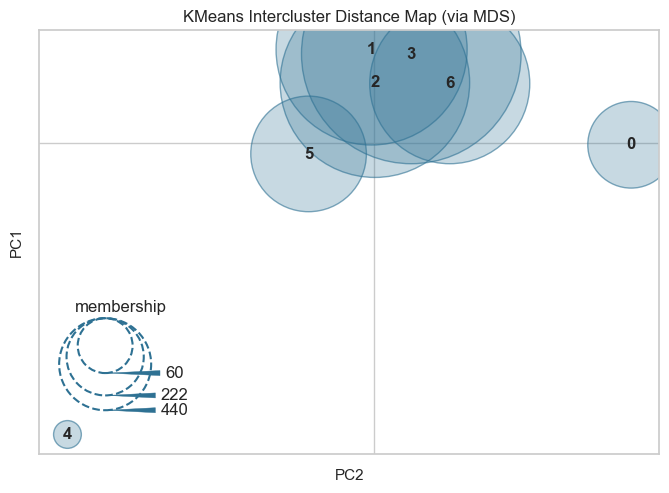

In [10]:
# Inter cluster distance map
from yellowbrick.cluster import InterclusterDistance
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(seg_kmeans)
visualizer.fit(seg)        # Fit the data to the visualizer
visualizer.show();     # Finalize and render the figure

In [24]:
segmentation_result['SalesYear'] = segmentation_result['avg_order_size']*segmentation_result['avg_order_freq']*(1 - segmentation_result['return_rate'])
segmentation_result['ProfitYear'] = segmentation_result['SalesYear']*0.52-segmentation_result['avg_mktg_cnt']*0.75

aggs = dict(zip(bases_variables, ['mean'] * len(bases_variables)))
aggs['Cust_No'] = 'count'
aggs['SalesYear'] = 'sum'
aggs['ProfitYear'] = 'sum'

columns = bases_variables
columns = columns + ['Cust_No', 'SalesYear', 'ProfitYear']

bases_summary = pd.pivot_table(
    segmentation_result,
    values = columns,
    columns = 'segment',
    aggfunc = aggs
)
    

In [25]:
bases_summary.index = ['Count of Segment', 'Total Profit per Year', 'Total Sales per Year', 'avg mktg cnt', 'avg order freq',
       'avg order size', 'avg crossbuy', 'avg multichannel', 'avg per sale', 'avg return rate',
       'avg tenure']

bases_summary = bases_summary.reindex(index = ['avg mktg cnt', 'avg order freq',
       'avg order size', 'avg crossbuy', 'avg multichannel', 'avg per sale', 'avg return rate',
       'avg tenure', 'Count of Segment', 'Total Sales per Year', 'Total Profit per Year'])

bases_summary

segment,1,2,3,4,5,6,7
avg mktg cnt,135.616667,5.953690,8.716394,8.929943,23.870536,12.266010,38.963591
avg order freq,3.030133,2.085167,0.781351,1.315289,0.317100,0.516159,3.047309
avg order size,38.968040,29.588601,49.755724,23.269489,366.729167,115.390807,34.362015
avg crossbuy,4.050000,3.520879,2.095455,2.142678,1.500000,1.766667,3.545045
avg multichannel,1.900000,1.802198,1.429545,1.461827,1.000000,1.366667,1.680180
avg per sale,0.018593,0.291855,0.042067,0.051372,0.125000,0.053627,0.045873
avg return rate,0.112420,0.203227,0.103691,0.217994,0.000000,0.074208,0.155133
avg tenure,1.900000,32.967033,9.854545,8.846058,11.250000,7.516667,5.878378
Count of Segment,20.000000,455.000000,440.000000,799.000000,4.000000,60.000000,222.000000
Total Sales per Year,1955.886332,22019.802595,14246.806341,20038.597484,479.709957,3027.597665,18565.080482


In [13]:
descriptors_variables = ['married', 'own_home', 'household_size', 'loyalty_card', 'income', 'age']
aggs = dict(zip(descriptors_variables, ['mean'] * len(descriptors_variables)))
aggs['Cust_No'] = 'count'

columns = descriptors_variables + ['Cust_No']

descriptors_summary = pd.pivot_table(
    segmentation_result,
    values = columns,
    columns = 'segment',
    aggfunc = aggs
)

descriptors_summary.index = ['Count of Segment', 'avg age', 'avg household size', 'avg income', 'avg Loyalty card', 'avg married', 'avg own home']

descriptors_summary


segment,1,2,3,4,5,6,7
Count of Segment,20.00,455.000000,440.000000,799.000000,4.00,60.000000,222.000000
avg age,37.50,43.936264,39.334091,43.783479,41.75,42.000000,45.707207
avg household size,3.45,2.279121,2.404545,3.458073,1.50,2.216667,3.027027
avg income,71.75,97.010989,71.068182,68.197747,65.00,70.916667,70.833333
avg Loyalty card,0.75,0.589011,0.684091,0.598248,0.50,0.666667,0.599099
avg married,0.50,0.881319,0.293182,0.352941,0.25,0.400000,0.360360
avg own home,0.30,0.375824,0.288636,0.858573,0.25,0.333333,0.563063


In [14]:
segmentation_result.columns

Index(['Cust_No', 'avg_order_size', 'avg_order_freq', 'crossbuy',
       'multichannel', 'per_sale', 'tenure', 'return_rate', 'married',
       'own_home', 'household_size', 'loyalty_card', 'income', 'age',
       'avg_mktg_cnt', 'zip_code', 'segment', 'SalesYear', 'ProfitYear'],
      dtype='object')

In [26]:
attract_df = pd.pivot_table(
    segmentation_result,
    values = ['Cust_No', 'SalesYear', 'ProfitYear'],
    index = ['segment'],
    aggfunc = {
        'Cust_No': 'count',
        'SalesYear': ['sum', 'mean'],
        'ProfitYear': ['sum', 'mean'],
    }
)
    

In [27]:
attract_df.columns = attract_df.columns.to_flat_index()
attract_df.columns = ['Segment Size', 'Avg Profit per Customer',  'Total Profit', 'Avg Sales per Customer', 'Total Sales']

In [17]:
attract_df

,Segment Size,Avg Profit per Customer,Total Profit,Avg Sales per Customer,Total Sales
segment,,,,,
1,20,-50.859455,-1017.189107,97.794317,1955.886332
2,455,20.700221,9418.600535,48.395171,22019.802595
3,440,10.299839,4531.929243,32.379105,14246.806341
4,799,6.343933,5068.802590,25.079596,20038.597484
5,4,44.459393,177.837570,119.927489,479.709957
6,60,17.039672,1022.380321,50.459961,3027.597665
7,222,14.263080,3166.403870,83.626489,18565.080482


## Discriminant Analysis and classification

In [47]:
## Load Packages and Set Seed
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import statsmodels.api as sm

# Set seed
import numpy as np
np.random.seed(1)

## Read in Segment Data and Classification Data 
seg = segmentation_result.copy()
class_data = pd.read_csv('lda/retail_classification.csv')

print("Run Discriminant Analysis")
X = seg[['married', 'own_home', 'household_size', 'income', 'age']]
y = seg['segment']
fit = LDA().fit(X, y)

Run Discriminant Analysis


In [48]:
# Group means
group_means = pd.DataFrame(fit.means_, columns=X.columns, index=fit.classes_)
print("Group Means:")
display(group_means) # print the summary statistics of your discriminant analysis
# Coefficients of Linear Discriminants
coefficients = pd.DataFrame(fit.coef_, columns=X.columns, index=fit.classes_)
print("Coefficients of Linear Discriminants:")
display(coefficients)
print(25*"-")

Group Means:


,married,own_home,household_size,income,age
1,0.500000,0.300000,3.450000,71.750000,37.500000
2,0.881319,0.375824,2.279121,97.010989,43.936264
3,0.293182,0.288636,2.404545,71.068182,39.334091
4,0.352941,0.858573,3.458073,68.197747,43.783479
5,0.250000,0.250000,1.500000,65.000000,41.750000
6,0.400000,0.333333,2.216667,70.916667,42.000000
7,0.360360,0.563063,3.027027,70.833333,45.707207


Coefficients of Linear Discriminants:


,married,own_home,household_size,income,age
1,0.169557,-1.469454,0.128190,-0.002617,-0.010643
2,2.106469,-0.980776,-0.114889,0.010649,0.003421
3,-0.877408,-1.523522,-0.090005,-0.003138,-0.006643
4,-0.548559,1.552059,0.115065,-0.003239,0.000620
5,-1.086701,-1.740168,-0.280132,-0.006793,-0.000927
6,-0.325908,-1.280135,-0.131846,-0.003316,-0.000947
7,-0.511598,-0.046549,0.028861,-0.002694,0.005153


-------------------------


In [46]:
lda_pred = fit.transform(X)
fit_models = []
for i in range(lda_pred.shape[1]):
    print(f"LDA {i}")
    X_const = sm.add_constant(lda_pred[:, i])
    mlr_model_sm = sm.MNLogit(seg['segment'], X_const).fit()
    fit_models.append(mlr_model_sm)
    #display(mlr_model_sm.summary())
    display(mlr_model_sm.pvalues)

LDA 0
Optimization terminated successfully.
         Current function value: 1.249579
         Iterations 8


,0,1,2,3,4,5
const,1.636397e-26,4.760689e-38,2.988515e-47,0.005518,0.000054,2.352126e-23
x1,2.105625e-03,6.810818e-01,2.184140e-06,0.990020,0.960632,2.976923e-02


LDA 1
Optimization terminated successfully.
         Current function value: 1.344712
         Iterations 10


,0,1,2,3,4,5
const,1.799022e-36,2.184142e-31,3.069023e-54,0.007738,0.000233,2.730804e-23
x1,2.704096e-04,6.734509e-02,1.076641e-02,0.269159,0.519323,4.432864e-01


LDA 2
Optimization terminated successfully.
         Current function value: 1.442440
         Iterations 9


,0,1,2,3,4,5
const,8.048923e-38,4.980548e-37,3.072452e-52,0.007433,0.000017,1.044011e-22
x1,4.838049e-02,5.857431e-02,5.151199e-02,0.149061,0.031213,2.326107e-02


LDA 3
Optimization terminated successfully.
         Current function value: 1.442712
         Iterations 9


,0,1,2,3,4,5
const,4.061238e-41,3.205343e-40,2.326524e-57,0.004284,0.000019,4.301770e-24
x1,2.524308e-01,2.101078e-01,2.260861e-01,0.434221,0.274536,6.007164e-01


LDA 4
Optimization terminated successfully.
         Current function value: 1.443945
         Iterations 9


,0,1,2,3,4,5
const,2.154992e-42,1.815460e-41,2.292383e-59,0.003468,0.000023,7.726507e-25
x1,7.096077e-01,6.771032e-01,7.189323e-01,0.905357,0.939589,6.910650e-01


In [28]:
## Check Discriminant Model Fit
print("Check Discriminant Model Fit")
pred_seg = fit.predict(X)
tseg = pd.crosstab(seg['segment'], pred_seg)
tseg = tseg.reindex(columns=tseg.index.values, fill_value=0)
display(tseg) # print table
accuracy = np.diag(tseg).sum() / len(seg)
print(25*"-")
print(f"Classifier accuracy: {accuracy*100:.2f}% for LDA vs {1/seg['segment'].max()*100:.2f}% for Random Allocation") # print percent correct
print(25*"-")

Check Discriminant Model Fit


col_0,1,2,3,4,5,6,7
segment,,,,,,,
1,0,7,7,6,0,0,0
2,0,309,31,115,0,0,0
3,0,105,222,113,0,0,0
4,0,81,68,650,0,0,0
5,0,1,2,1,0,0,0
6,0,18,24,18,0,0,0
7,0,43,67,112,0,0,0


-------------------------
Classifier accuracy: 59.05% for LDA vs 14.29% for Random Allocation
-------------------------


In [29]:
## Run Classification Using Discriminant Function
print("Classification Using Discriminant Function")
pred_class = fit.predict(class_data[['married', 'own_home', 'household_size', 'income', 'age']])
tclass = pd.Series(pred_class).value_counts()
display(tclass) # print table
print(25*"-")

## Add Predicted Segment to Classification Data
class_data['pred_class'] = pred_class
class_data.to_csv('lda/classification_pred.csv', index=False)

Classification Using Discriminant Function


4    6497
2    1188
3     315
Name: count, dtype: int64

-------------------------


In [23]:
pd.pivot_table(
    class_data,
    columns = ['pred_class'],
    index = ['zip_code'],
    values = ['Pros_No'],
    aggfunc = 'count'
).head(20)

Pros_No           
pred_class       2    3     4
zip_code                     
7726           2.0  NaN  18.0
7728           7.0  NaN  47.0
8002           NaN  NaN  10.0
8003           NaN  NaN  36.0
8004           NaN  NaN   8.0
8005           3.0  1.0  17.0
8007           NaN  NaN   4.0
8008           2.0  1.0  11.0
8009           NaN  NaN   9.0
8010           1.0  NaN   2.0
8012           3.0  NaN   9.0
8015           NaN  NaN   3.0
8016           1.0  NaN  16.0
8021           NaN  NaN  10.0
8022           1.0  NaN  12.0
8026           NaN  NaN   3.0
8028           1.0  NaN   6.0
8030           NaN  1.0   1.0
8031           NaN  NaN   3.0
8033           6.0  NaN  16.0